# Import

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
sys.path.append('src')
from src.fast_ica import Fast_ICA
from src.fast_ica import Fast_ICA
from sklearn.decomposition import FastICA as sk_FastICA


%load_ext autoreload
%autoreload 2

# Hyperparameters

In [2]:
NB_SAMPLES    = 100_000
NB_COMPONENTS = 2
NB_FEATURES   = 2

# Smooth signals

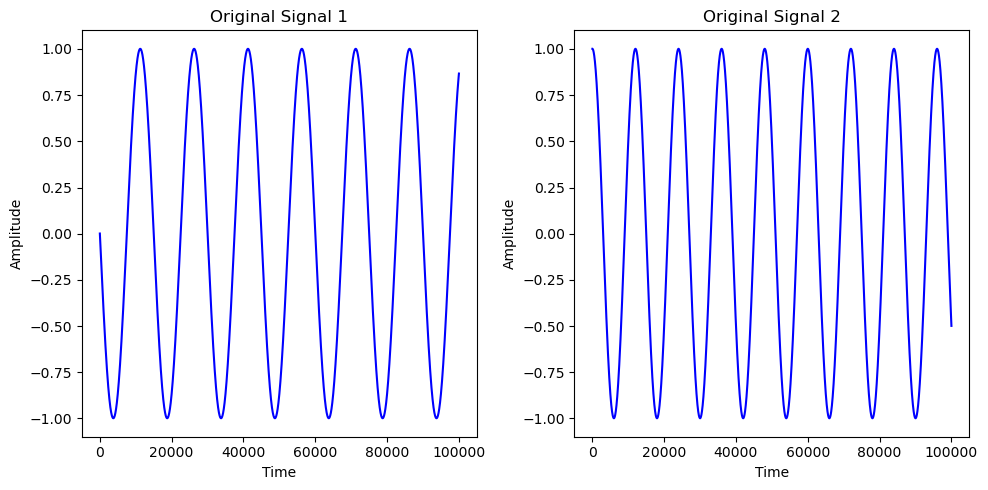

In [3]:
S = np.zeros((NB_FEATURES, NB_SAMPLES))
for k in range(NB_FEATURES):
    S[k] = np.cos(2*np.pi*np.linspace(0, 100, NB_SAMPLES)/np.random.randint(low=10, high=20) + np.random.binomial(p=0.5, n=1) * np.pi / 2) + 1e-3

plt.subplots(1, NB_FEATURES, figsize=(10, 5))

for k in range(NB_FEATURES):
    plt.subplot(1, NB_FEATURES, k+1)
    plt.plot(S[k], color='blue')
    plt.title('Original Signal {}'.format(k+1))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [5]:
S.shape

(2, 100000)

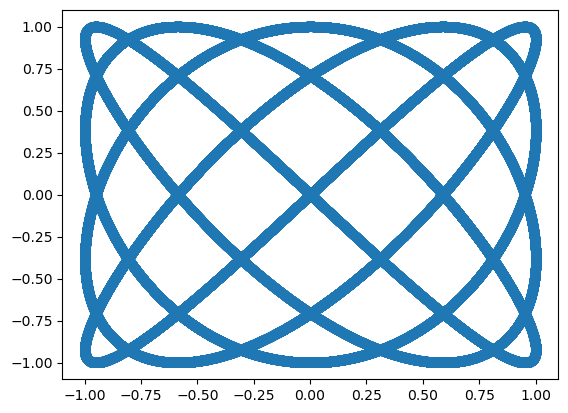

In [11]:
plt.scatter(S[0], S[1])

# Mixed Signals

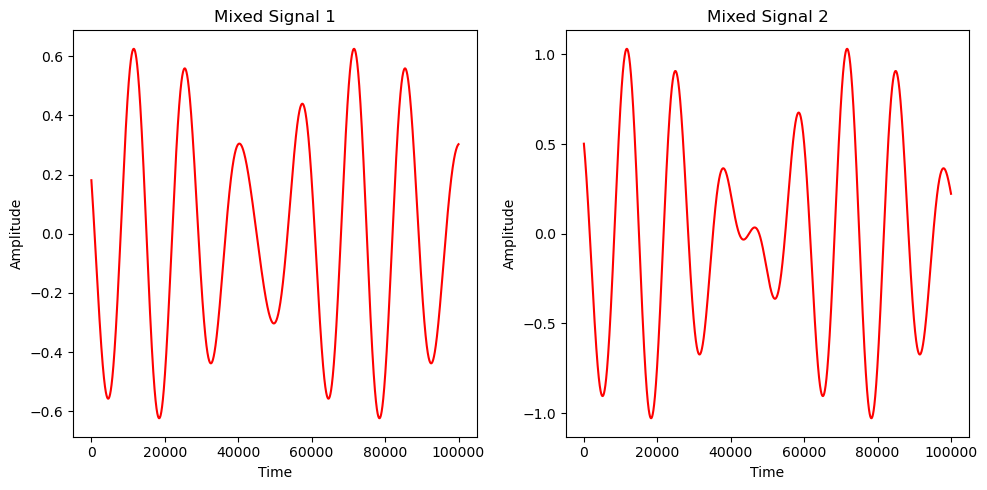

In [26]:
A = np.random.random(size=(NB_COMPONENTS, NB_FEATURES))
X = A @ S

plt.subplots(1, NB_COMPONENTS, figsize=(10, 5))

for k in range(NB_COMPONENTS):
    plt.subplot(1, NB_COMPONENTS, k+1)
    plt.plot(X[k], color='red')
    plt.title('Mixed Signal {}'.format(k+1))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

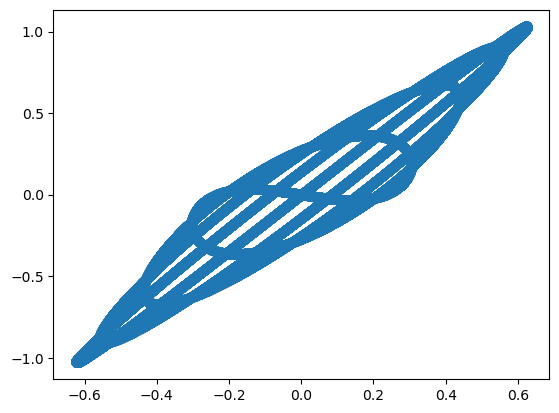

In [27]:
plt.scatter(X[0], X[1])

# Implement ICA algorithm

In [29]:
# %%timeit
ica = Fast_ICA(n_components=NB_FEATURES)
S_ = ica.fit_transform(X, method='parallel')
S_

array([[ 0.0693746 ,  0.06997617,  0.07057771, ..., -1.35791767,
        -1.35827452, -1.35863113],
       [-1.40380459, -1.40384106, -1.40387714, ...,  0.81658126,
         0.81724862,  0.81791577]])

In [30]:
ica = sk_FastICA(n_components=NB_COMPONENTS)
S_scikit = ica.fit_transform(X.T)

In [ ]:
# %%timeit
# ica = Fast_ICA(n_components=NB_FEATURES, func='exp')
# S_ = ica.fit_transform(X, method='parallel')
# S_

18.8 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# ica = Fast_ICA(n_components=NB_FEATURES)
# S_ = ica.fit_transform(X, method='parallel')
# S_

array([[ 0.04904858,  0.04858098,  0.04811337, ..., -1.36439717,
        -1.36436006, -1.36432279],
       [-1.39776396, -1.39775751, -1.39775068, ...,  0.75076418,
         0.75140816,  0.75205193]], shape=(2, 100000))

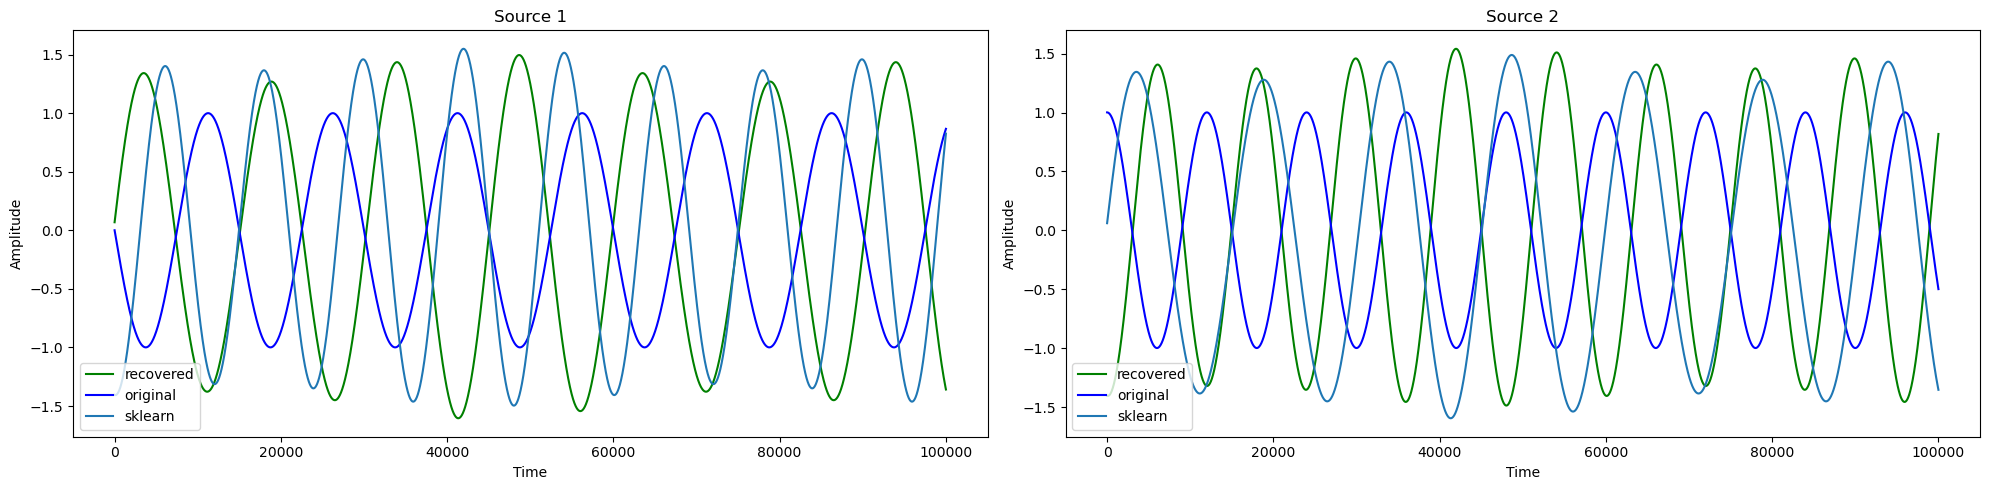

In [31]:
plt.subplots(1, NB_COMPONENTS, figsize=(20,5))

for k in range(NB_FEATURES):
    plt.subplot(1, NB_FEATURES, k+1)
    plt.plot(S_[k], color='green', label="recovered")
    plt.plot(S[k], color='blue', label="original")
    plt.plot(S_scikit[:, k], label='sklearn')
    plt.title('Source {}'.format(k+1))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()

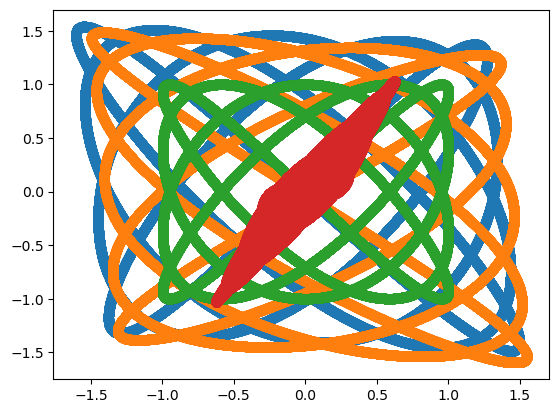

In [32]:
plt.scatter(S_[0], S_[1])
plt.scatter(S_scikit[:, 0], S_scikit[:, 1])
plt.scatter(S[0], S[1])
plt.scatter(X[0], X[1])

In [10]:
# from dtw import dtw
# matrix_dtw = np.zeros((NB_COMPONENTS, NB_COMPONENTS))

# for i in range(NB_COMPONENTS):
#     for j in range(NB_COMPONENTS):
#         matrix_dtw[i, j] = dtw(S[i], S_[j]).distance

# matrix_dtw

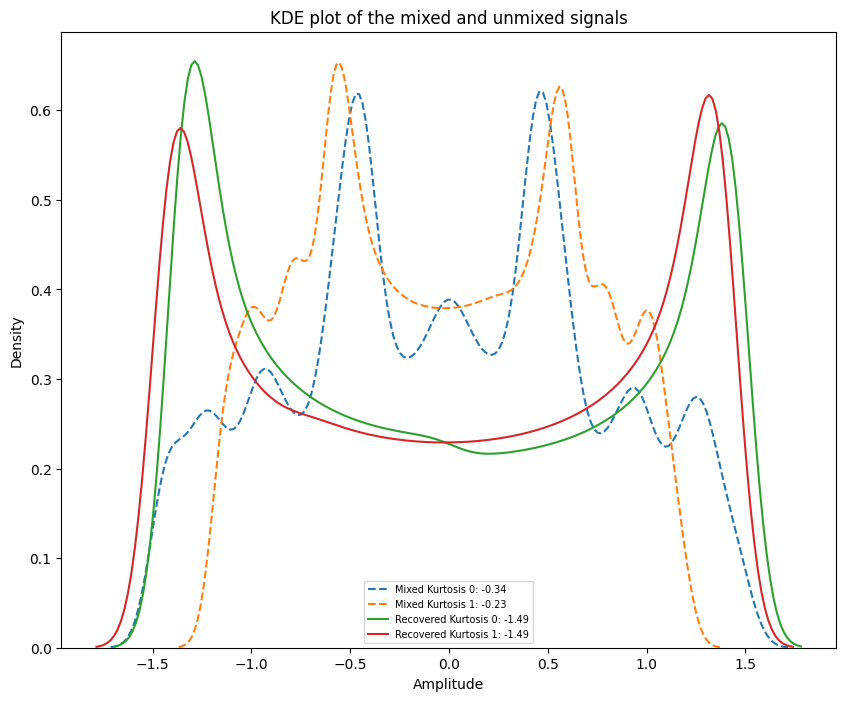

In [96]:
import seaborn as sns

def kurtosis(X):
    return np.mean(X**4, axis=1) - 3 * np.mean(X**2, axis=1)**2

plt.figure(figsize=(10, 8))
plt.title('KDE plot of the mixed and unmixed signals')

for i in range(NB_COMPONENTS):
    sns.kdeplot(X[i], ls='--', label=f"Mixed Kurtosis {i}: {kurtosis(X)[i]:.2f}")

for i in range(NB_FEATURES):
    sns.kdeplot(S_[i], label=f"Recovered Kurtosis {i}: {kurtosis(S_)[i]:.2f}")

plt.tick_params(labelsize=10)
plt.legend(loc='best', fontsize=7)
plt.xlabel('Amplitude', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()